In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from transformers import BertModel, DistilBertModel
from transformers import pipeline
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import datasets
import numpy as np
import data
import os.path
from datasets import load_from_disk
import pickle as pkl
from sklearn.linear_model import LogisticRegressionCV
from collections import defaultdict
from copy import deepcopy
from tqdm import tqdm
import dvu
dvu.set_style()
import pandas as pd
import config
from os.path import join as oj
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)

In [4]:
rs = data.load_fitted_results()

100%|██████████| 72/72 [00:04<00:00, 16.35it/s]


# all curves

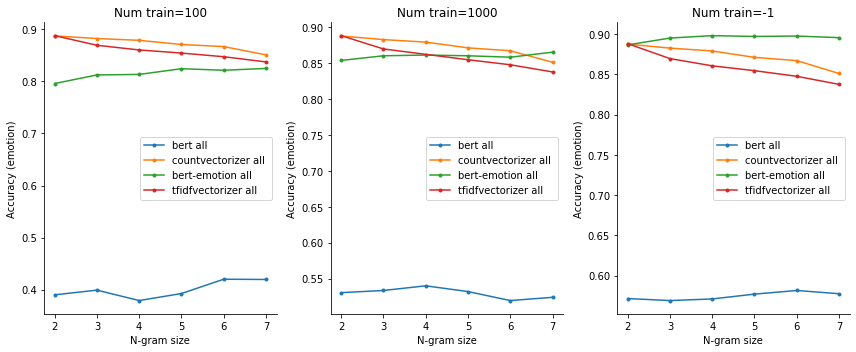

<Figure size 432x288 with 0 Axes>

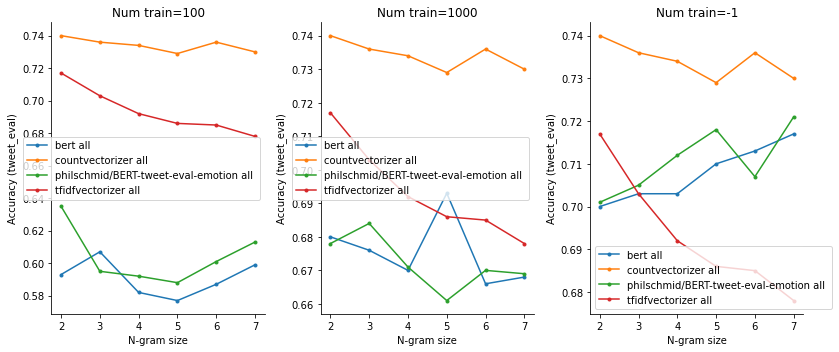

<Figure size 432x288 with 0 Axes>

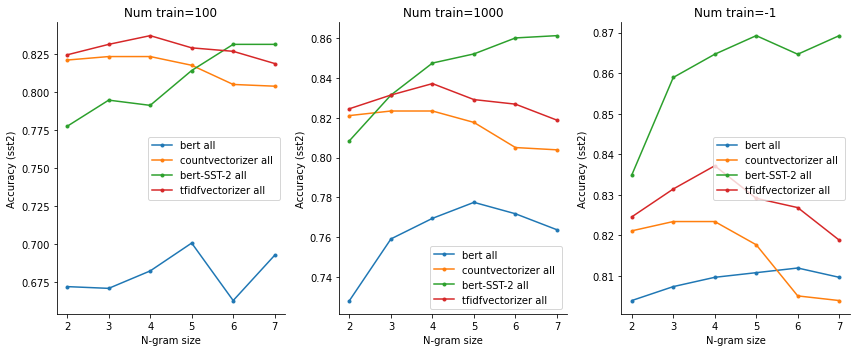

<Figure size 432x288 with 0 Axes>

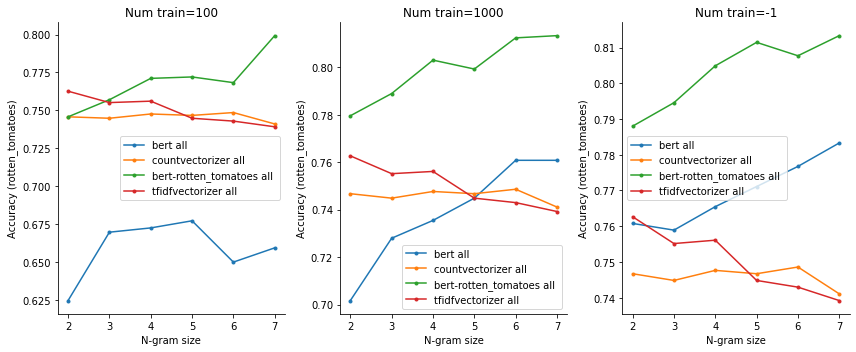

<Figure size 432x288 with 0 Axes>

In [5]:
for dset in rs.dataset.unique():
    r = rs[rs.dataset == dset]

    R = 1
    C = 3
    plt.figure(figsize=(12, 5))
    # plt.figure(figsize=(8, 12))
    for i, subsample in enumerate([100, 1000, -1]):
        plt.subplot(R, C, i + 1)
        plt.title('Num train=' + str(subsample))
        d = r[r.subsample == subsample]

        curve = d.groupby(['checkpoint', 'all', 'norm'])
        for key, group in curve:
            g = group.sort_values('ngrams')
            plt.plot(g.ngrams, g.acc_val, '.-',
                     label=(
                         ' '.join(key)
                         .replace('textattack/', '')
                         .replace('bert-base-uncased', 'bert')
                         .replace('nateraw/', '')
#                          .lower()
                     ))
        plt.ylabel(f'Accuracy ({dset})')
        plt.xlabel('N-gram size')


        plt.legend()
#         dvu.line_legend(fontsize=12)

    plt.tight_layout()
    plt.show()
    plt.savefig(f'results/acc_by_ngrams_{dset}.pdf')
    #     print(curve)

# best models table

In [6]:
rs

,checkpoint,ngrams,subsample,all,norm,dataset,seed,padding,dataset_key_text,num_features,acc_train,acc_val
0,bert-base-uncased,2,-1,all,,emotion,1,True,text,768,0.562312,0.571500
1,countvectorizer,2,-1,all,,emotion,1,True,text,121366,0.998125,0.887500
2,nateraw/bert-base-uncased-emotion,2,-1,all,,emotion,1,True,text,768,0.909188,0.886500
3,tfidfvectorizer,2,-1,all,,emotion,1,True,text,121366,0.998125,0.888000
4,bert-base-uncased,2,1000,all,,emotion,1,True,text,768,0.660000,0.530500
5,countvectorizer,2,1000,all,,emotion,1,True,text,121366,0.998125,0.887500
6,nateraw/bert-base-uncased-emotion,2,1000,all,,emotion,1,True,text,768,0.979000,0.853500
7,tfidfvectorizer,2,1000,all,,emotion,1,True,text,121366,0.998125,0.888000
8,bert-base-uncased,2,100,all,,emotion,1,True,text,768,0.840000,0.390000
9,countvectorizer,2,100,all,,emotion,1,True,text,121366,0.998125,0.887500
